### Run tensorflow structure

In [ ]:
# https://hackmd.io/s/HJxsUvOpg
# initialize
import tensorflow as tf
import numpy as np

x = np.random.rand(100).astype(np.float32)
y = x*0.5 + 0.9

# build tensorflow structure
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))
Y = Weights*x + biases 

# mean square error
loss = tf.reduce_mean(tf.square(Y-y))

# Proporgation
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Training
init = tf.global_variables_initializer()

In [ ]:
# method 1
sess = tf.Session()
sess.run(init)
for step in range(200):
    sess.run(train)
    if step % 10:
        print(step, sess.run(Weights), sess.run(biases),sess.run(loss))
sess.close()

In [ ]:
# method 2
with tf.Session() as sess:
    sess.run(init)
    for step in range(200):
        sess.run(train)
        if step % 10:
            print(step, sess.run(Weights), sess.run(biases),sess.run(loss))

###  tf.Variable, tf.assign, and tf.global_variables_initializer

In [ ]:
# Variable
import tensorflow as tf

state = tf.Variable(0, name='counter')

# define variable one
one = tf.constant(1)
new_value = tf.add(state, one)

# update state to new variable
# tf.assign: state=new_value
update = tf.assign(state, new_value)

# initialize
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(10):
        print('new_value:', sess.run(new_value))
        sess.run(update)
        print('state:', sess.run(state))
        

In [ ]:
# 利用 Fetch 方式來一次取得多個節點的 Tensor
with tf.Session() as sess:
    sess.run(init)
    for i in range(10):
        print('Update before:', sess.run([new_value, state]))
        sess.run(update)
        print('Update after:', sess.run([new_value, state]))

### tf.placeholder

In [ ]:
# placeholder(替換 Tensor 內容)
import tensorflow as tf

var1, var2 = tf.placeholder(tf.float32), tf.placeholder(tf.float32)
output = tf.multiply(var1, var2)

In [ ]:
with tf.Session() as sess:
    print(sess.run(output, feed_dict={var1: 10, var2: 12}))

### Linear fitting with tensorflow

In [ ]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
plt.rcParams["animation.html"] = "jshtml"
import numpy as np
import tensorflow as tf

# define layer
def add_layer(inputs, in_size, out_size, activation_fun = None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]))
    # tf.matmul: 两个矩阵相乘
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_fun is None:
        output = Wx_plus_b
    else:
        output = activation_fun(Wx_plus_b)
    return output

# import data
x_data = np.linspace(-1, 1, 300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

# placeholder
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

In [ ]:
# building network visualization
l1 = add_layer(xs, 1, 10, activation_fun = tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_fun = None)

# define loss function
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))

# optimization
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

In [ ]:
# training
predicts = []
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(500):
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})

        if i % 10 == 0:
            prediction_value = \
                sess.run(prediction, feed_dict={xs: x_data})
            predicts.append(prediction_value)

In [ ]:
# plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def animate(i, predicts, x_data, y_data):
    predict = predicts[i]
    ax.clear()
    ax.scatter(x_data, y_data)
    ax.plot(x_data, predict, 'r-', lw=5)
    ax.set_xlim(min(x_data)-0.5, max(x_data)+0.5)
    ax.set_ylim(min(y_data)-0.5, max(y_data)+0.5)

ani = animation.FuncAnimation(fig, animate, frames=len(predicts), fargs=(predicts, x_data, y_data,))
ani

### tf.reduce_sum

In [ ]:
'''tf.reduce_sum:
'x' is [[1, 2, 3]

        [4, 5, 6]]

* sum
tf.reduce_sum(x) ==> 21

* sum by rows
tf.reduce_sum(x, 0) ==> [5, 7, 9]

* sun by columns
tf.reduce_sum(x, 1) ==> [6, 15]

* 按照行的维度求和
tf.reduce_sum(x, 1, keep_dims=True) ==> [[6], [15]]

* 行列求和
tf.reduce_sum(x, [0, 1]) ==> 21
'''

x = np.array([[1,2,3], [4,5,6]])
a1 = tf.reduce_sum(x)
a2 = tf.reduce_sum(x, reduction_indices=[0])
a3 = tf.reduce_sum(x, reduction_indices=[1])
a4 = tf.reduce_sum(x, reduction_indices=[1], keep_dims=True)
a5 = tf.reduce_sum(x, reduction_indices=[1, 0])

with tf.Session() as sess:
    res = sess.run([a1, a2, a3, a4, a5])

for i in range(5):
    print('a'+str(i+1)+':', res[i])

### Activation function

In [25]:
# https://github.com/beckhong/Tensorflow-Tutorial/blob/master/tutorial-contents/204_activation.py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.nn import relu, sigmoid, tanh, softplus

def activation_plot(x, y, label, ylim):
    plt.figure(1, figsize=(4, 3))
    plt.plot(x, y, c='red', label=label)
    plt.ylim(ylim)
    plt.legend(loc='best')
    plt.show()

In [17]:
x = np.linspace(-5, 5, 200)     # x data, shape=(100, 1)

# following are popular activation functions
y_relu = relu(x)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_softplus =softplus(x)

sess = tf.Session()
y_relu, y_sigmoid, y_tanh, y_softplus = sess.run([y_relu, y_sigmoid, y_tanh, y_softplus])

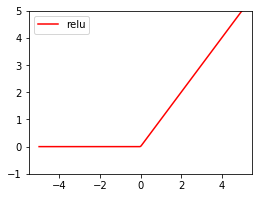

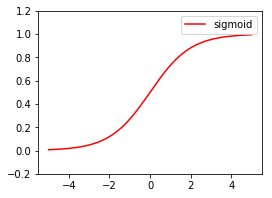

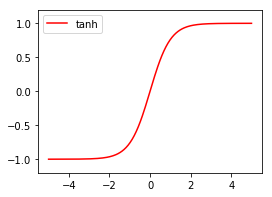

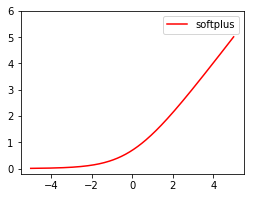

In [27]:
# plt to visualize these activation function
activation_plot(x, y_relu, 'relu', (-1, 5))
activation_plot(x, y_sigmoid, 'sigmoid', (-0.2, 1.2))
activation_plot(x, y_tanh, 'tanh', (-1.2, 1.2))
activation_plot(x, y_softplus, 'softplus', (-0.2, 6))

### Classification

In [1]:
# https://morvanzhou.github.io/tutorials/machine-learning/tensorflow/5-01-classifier/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


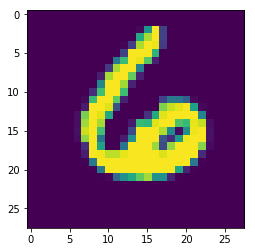

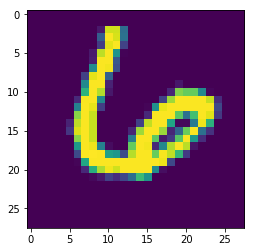

In [2]:
# https://stackoverflow.com/questions/42353676/display-mnist-image-using-matplotlib?rq=1
# images
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

# Get a batch of two random images and show in a pop-up window.
batch_xs, batch_ys = mnist.test.next_batch(2)
gen_image(batch_xs[0]).show()
gen_image(batch_xs[1]).show()

In [12]:
# define layer
def add_layer(inputs, in_size, out_size, activation_fun = None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]))
    # tf.matmul: 两个矩阵相乘
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_fun is None:
        output = Wx_plus_b
    else:
        output = activation_fun(Wx_plus_b)
    return output

# accuracy
def compute_accuracy(prediction, v_xs, v_ys):
    # prediction using validation sets
    y_pred = sess.run(prediction, feed_dict={xs: v_xs})
    # 取預測結果最大值，計算其位置(label)並與真實y的label做比較
    correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.argmax(v_ys, 1))
    # compute accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

# building simple network(輸入+輸出層)
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
ys = tf.placeholder(tf.float32, [None, 10])

# 輸入784個feature；輸出10個feature，使用softmax
prediction = add_layer(xs, 784, 10, activation_fun=tf.nn.softmax)

In [13]:
# cross entropy: L=-sum(y_j*log(softmax_j), j=1,2,...,10)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                               reduction_indices=[1])) # loss
# using Gradient Descent
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
# 不要使用tf.initialize_all_variables()
sess.run(tf.global_variables_initializer())

In [14]:
# training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})
    if i % 50 == 0:
        print(compute_accuracy(prediction, mnist.test.images, mnist.test.labels))

0.0899
0.6413
0.7434
0.7855
0.8091
0.823
0.8364
0.8406
0.8422
0.853
0.8522
0.8603
0.8602
0.868
0.8628
0.8712
0.8685
0.8696
0.8773
0.8752


### Saving model

In [ ]:
def 

### Dropout - to prevent overfitting

In [ ]:
# building network with one hidden layer(輸入+隱藏層+輸出層)
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
ys = tf.placeholder(tf.float32, [None, 10])

l1 = add_layer(xs, 64, 50, 'l1', activation_function=tf.nn.tanh)
prediction = add_layer(l1, 50, 10, 'l2', activation_function=tf.nn.softmax)

In [ ]:
## https://morvanzhou.github.io/tutorials/machine-learning/tensorflow/3-3-visualize-result/